### 손글씨 숫자 데이터 분류

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()

X = digits.data
print(type(X))
print(X.shape)

y = digits.target
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(1797, 64)
<class 'numpy.ndarray'>
(1797,)
[0 1 2 ... 8 9 8]


### 학습과 테스트 데이터 분류

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print('Type: x_train, y_train, x_test, y_test')
print(type(x_train), type(y_train), type(x_test), type(y_test))

print('Type: x_train, y_train, x_test, y_test')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Type: x_train, y_train, x_test, y_test
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Type: x_train, y_train, x_test, y_test
(1617, 64) (1617,) (180, 64) (180,)


### Tensor로 변환

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float).to('cuda')
y_train = torch.tensor(y_train, dtype=torch.long).to('cuda')
x_test = torch.tensor(x_test, dtype=torch.float).to('cuda')
y_test = torch.tensor(y_test, dtype=torch.long).to('cuda')

### Dataset을 만든다.


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

print(train_dataset)
print(test_dataset)

### Dataloader를 만든다.

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10000, shuffle=True)  # 한번에 시험보려고(있는 만큼) -> 그래서 batch_size를 10000으로 설정

print(train_dataset)
print(test_dataset)

## 학습을 위한 모델, Loss, Optimizer 설정
### 다층 nn.Linear를 이용한 모델

In [ ]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

### Loss함수: Cross Entropy
### Optimizer: Adam

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

### 학습 시작

In [ ]:
losses = []
net.train()
net.to('cuda')

for epoc in range(200):

  batch_loss = 0.0

  for x_train, y_train in train_dataloader:
    
    optimizer.zero_grad()

    y_pred = net(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()

    optimizer.step()
    batch_loss += loss.item()
  losses.append(batch_loss)
  print(epoc, 'Loss: ', batch_loss)

0 Loss:  26.284514278173447
1 Loss:  7.388579174876213
2 Loss:  5.019735589623451
3 Loss:  2.9164623245596886
4 Loss:  3.117889951914549
5 Loss:  2.1765050273388624
6 Loss:  2.768467809073627
7 Loss:  1.824886185117066
8 Loss:  2.0366579084657133
9 Loss:  1.2465459667146206
10 Loss:  0.837791244732216
11 Loss:  0.8046924266964197
12 Loss:  1.2730707505252212
13 Loss:  1.7789897653274238
14 Loss:  0.8311959808925167
15 Loss:  0.9567399441730231
16 Loss:  1.4191745278658345
17 Loss:  0.7370247544022277
18 Loss:  0.7325326055288315
19 Loss:  0.2861303298268467
20 Loss:  0.42062671412713826
21 Loss:  1.901837164972676
22 Loss:  3.1922713555395603
23 Loss:  1.612598791718483
24 Loss:  1.1683847661479376
25 Loss:  0.48300310553167947
26 Loss:  0.3413378060795367
27 Loss:  0.19860022031934932
28 Loss:  0.10243293996609282
29 Loss:  0.023662979274376994
30 Loss:  0.023698920987953898
31 Loss:  0.021359430382290157
32 Loss:  0.010863246832741424
33 Loss:  0.009608004198526032
34 Loss:  0.008648

### 학습과정 중의 loss visualization

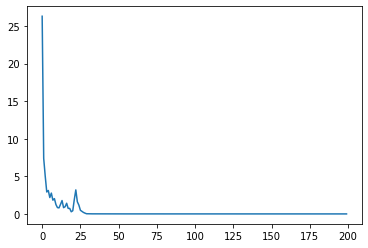

In [ ]:
plt.plot(losses)

### 테스트 시작

In [ ]:
net.eval()

with torch.no_grad():
  for x_test, y_test in test_dataloader:
    test_result = net(x_test)
    pred = torch.argmax(test_result, dim=1)

    num_correct = (pred == y_test).sum().item()
    print('Accuracy: ', num_correct * 100.0/len(y_test), '%')

Accuracy:  98.33333333333333 %
